# 합성곱 신경망을 사용한 이미지분류

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255 
train_scaled, val_scaled, train_target, val_target = \
    train_test_split(train_scaled, train_target, test_size=0.2, random_state = 42)

In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

In [3]:
# 최대 풀링 추가, 전형적인 풀링 크기 (2, 2) -> 특성 맵 크기 절반 감소
# 합성곱Conv2D 층에서 32개의 필터를 사용했기 때문에 맵 깊이는 32
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
# 3차원 특성 맵을 일렬로 펼쳐준다 > 마지막 10개의 뉴런을 가진 밀집 출력층에서 확률을 계산
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))

model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [7]:
keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [ ]:
keras.utils.plot_model(model, show_shapes=True)

## Compile

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb =keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, validation_data = (val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 6s 2ms/step - loss: 0.7452 - accuracy: 0.7276 - val_loss: 0.3391 - val_accuracy: 0.8740
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3641 - accuracy: 0.8669 - val_loss: 0.3063 - val_accuracy: 0.8865
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3084 - accuracy: 0.8894 - val_loss: 0.2575 - val_accuracy: 0.9043
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2742 - accuracy: 0.9002 - val_loss: 0.2599 - val_accuracy: 0.9038
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2521 - accuracy: 0.9056 - val_loss: 0.2405 - val_accuracy: 0.9088
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2290 - accuracy: 0.9156 - val_loss: 0.2376 - val_accuracy: 0.9136
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2123 - accuracy: 0.9221 - val_loss: 0.2287 - val_accuracy:

In [11]:
import matplotlib.pyplot as plt

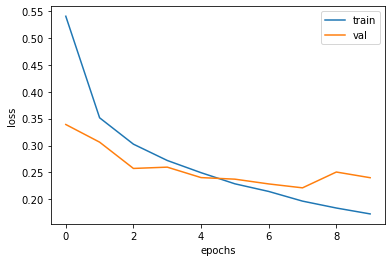

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])

In [13]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 800us/step - loss: 0.2214 - accuracy: 0.9193


[0.22144533693790436, 0.9192500114440918]

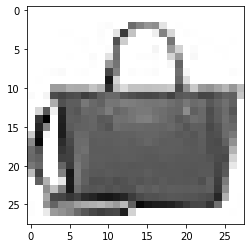

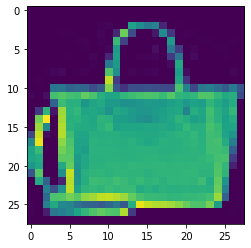

In [17]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()
plt.imshow(val_scaled[0].reshape(28, 28))
plt.show()

In [20]:
val_scaled.ndim

4

In [18]:
preds = model.predict(val_scaled[0:1])
preds

array([[1.0501304e-18, 2.6823262e-27, 1.2204644e-20, 4.9753797e-19,
        7.8129581e-20, 8.6221501e-16, 2.4808617e-18, 9.6567215e-23,
        1.0000000e+00, 3.8326909e-22]], dtype=float32)

Text(0, 0.5, 'prob.')

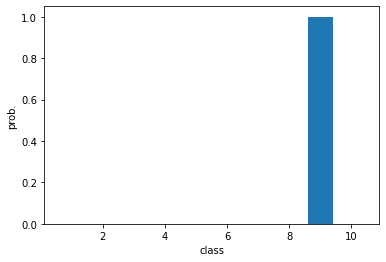

In [25]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
# 다른 클래스는 사실상 0값

In [26]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255

In [27]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 1ms/step - loss: 0.2433 - accuracy: 0.9140


[0.24329817295074463, 0.9139999747276306]